# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [40]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [41]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [42]:
data.shape, data.dtypes

((5391, 6),
 Rank                      int64
 Release_Date             object
 Movie_Title              object
 USD_Production_Budget    object
 USD_Worldwide_Gross      object
 USD_Domestic_Gross       object
 dtype: object)

In [43]:
data.isna().values.any()

False

In [44]:
data.duplicated().any()

False

In [45]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [46]:
data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']] = data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].replace({'\$':'',',':''}, regex=True)

In [47]:
data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
     ] = data[['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']].apply(pd.to_numeric)

In [48]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [49]:
data.Release_Date = pd.to_datetime(data.Release_Date)


In [50]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [51]:
data.agg({'USD_Production_Budget':'mean'})

USD_Production_Budget   31,113,737.58
dtype: float64

In [52]:
data.agg({'USD_Worldwide_Gross':'mean'})

USD_Worldwide_Gross   88,855,421.96
dtype: float64

In [53]:
data.agg({'USD_Worldwide_Gross':'min'}), data.agg({'USD_Domestic_Gross':'min'})

(USD_Worldwide_Gross    0
 dtype: int64,
 USD_Domestic_Gross    0
 dtype: int64)

In [54]:
data['Profit'] = data.USD_Worldwide_Gross - data.USD_Production_Budget

In [55]:
data.sort_values('Profit')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5366,79,2017-07-21,Valerian and the City of a Thousand Planets,180000000,52573132,31023132,-127426868
4028,170,2011-11-03,Mars Needs Moms,150000000,39549758,21392758,-110450242
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
...,...,...,...,...,...,...,...
4844,59,2015-03-04,Furious 7,190000000,1516748684,351032910,1326748684
5077,28,2015-12-06,Jurassic World,215000000,1671640593,652198010,1456640593
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225,1752662225
1034,37,1997-12-19,Titanic,200000000,2207615668,658672302,2007615668


In [56]:
data.quantile(q=.25)

Rank                         1,348.50
USD_Production_Budget    5,000,000.00
USD_Worldwide_Gross      3,865,206.00
USD_Domestic_Gross       1,330,901.50
Profit                  -2,244,775.00
Name: 0.25, dtype: float64

In [58]:
data.agg({'USD_Production_Budget':'max'}), data.agg({'USD_Worldwide_Gross':'max'})

(USD_Production_Budget    425000000
 dtype: int64,
 USD_Worldwide_Gross    2783918982
 dtype: int64)

In [64]:
data.loc[data['USD_Worldwide_Gross'].idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Profit                            2358918982
Name: 3529, dtype: object

In [71]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
count,"5,391.00","5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44","57,741,684.38"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27","140,972,329.93"
min,1.00,"1,100.00",0.00,0.00,"-175,000,000.00"
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50","-2,244,775.00"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00","8,122,000.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00","59,518,660.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00"


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [93]:
data[data.USD_Domestic_Gross == 0].shape[0]

512

In [84]:
data[data.USD_Domestic_Gross == 0].sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [92]:
data[data.USD_Worldwide_Gross == 0].shape[0]

357

In [95]:
data[data.USD_Worldwide_Gross == 0].sort_values(
    'USD_Production_Budget', ascending=False).head(5)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000


### Filtering on Multiple Conditions

In [103]:
data[(data['USD_Worldwide_Gross'] != 0) & (
    data['USD_Domestic_Gross'] != 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000,5100000
...,...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010,321856949
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [104]:
data.query('USD_Worldwide_Gross !=0 and USD_Domestic_Gross==0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [105]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
data.query('Release_Date > @scrape_date')

In [117]:
data_clean = data.query('Release_Date < @scrape_date')


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [121]:
(data_clean.query('Profit < 0').shape[0] / data_clean.shape[0]) * 100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

In [122]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



Text(0.5, 1.0, 'Movies Global Revenues')

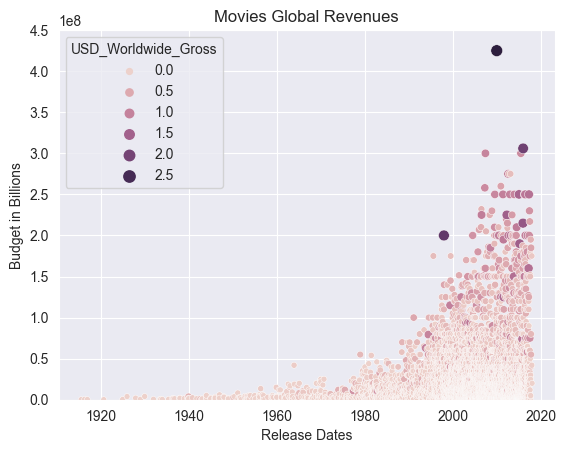

In [172]:
ax = plt.gca()


sns.set_style("darkgrid")
sns.scatterplot(data=data_clean,
                x='Release_Date',
                y='USD_Production_Budget',
                hue="USD_Worldwide_Gross",
                size='USD_Worldwide_Gross',
                ax = ax,)


ax.set_ylim(0, 450000000)
ax.set_ylabel('Budget in Billions')
ax.set_xlabel('Release Dates')
ax.set_title('Movies Global Revenues')


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [137]:
data_clean["Year"] = pd.DatetimeIndex(data_clean['Release_Date']).year

C:\Users\teoyo\AppData\Local\Temp\ipykernel_13756\719119048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Year"] = pd.DatetimeIndex(data_clean['Release_Date']).year


In [150]:
data_clean['Decade'] = (data_clean.Year // 10 * 10)

C:\Users\teoyo\AppData\Local\Temp\ipykernel_13756\912853413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean.Year // 10 * 10)


In [151]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Year,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,1915,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,1916,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,1916,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,1920,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,1925,1920
...,...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,2017,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,2017,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,2017,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,2017,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [147]:
old_films = data_clean.query('Year <= 1969')
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Year,Decade
count,153.00,153.00,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","25,808,336.73","1,953.99",194.92
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41","54,245,459.17",12.93,1.27
min,"1,253.00","100,000.00",0.00,0.00,"-14,250,000.00","1,915.00",191.00
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","2,175,000.00","1,946.00",194.00
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","7,364,370.00","1,956.00",195.00
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","27,402,877.00","1,964.00",196.00
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","386,625,192.00","1,969.00",196.00


In [149]:
old_films.loc[old_films.USD_Production_Budget.idxmax()]

Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Profit                              29000000
Year                                    1963
Decade                                   196
Name: 109, dtype: object

In [148]:
new_films = data_clean.query('Year > 1969')
new_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Year,Decade
count,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00","31,811,437.73","90,683,497.56","41,841,922.35","58,872,059.83","2,004.60",200.02
std,"1,549.33","40,758,580.67","170,424,978.36","66,702,734.68","142,586,941.57",9.16,0.96
min,1.00,"1,100.00",0.00,0.00,"-127,426,868.00","1,970.00",197.00
25%,"1,314.50","5,000,000.00","3,831,677.00","1,252,581.00","-2,386,213.50","2,000.00",200.00
50%,"2,629.00","18,000,000.00","28,544,120.00","17,510,118.00","8,322,573.00","2,006.00",200.00
75%,"3,967.50","40,000,000.00","98,777,000.00","53,301,583.00","61,453,613.50","2,012.00",201.00
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00","2,017.00",201.00


# Seaborn Regression Plots

Text(0.5, 1.0, 'Old Movies')

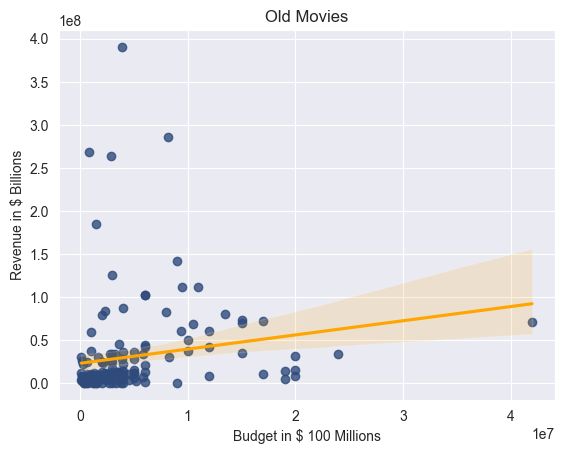

In [176]:
axes = plt.gca()


sns.set_style("darkgrid")
sns.regplot(data=old_films, y='USD_Worldwide_Gross',
            x='USD_Production_Budget',
            scatter_kws={'color': '#2f4b7c'},
            line_kws={'color': 'orange'},
            ax=axes,
            )

axes.set_ylabel('Revenue in $ Billions')
axes.set_xlabel('Budget in $ 100 Millions')
axes.set_title('Old Movies')


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

Text(0.5, 1.0, 'New Movies')

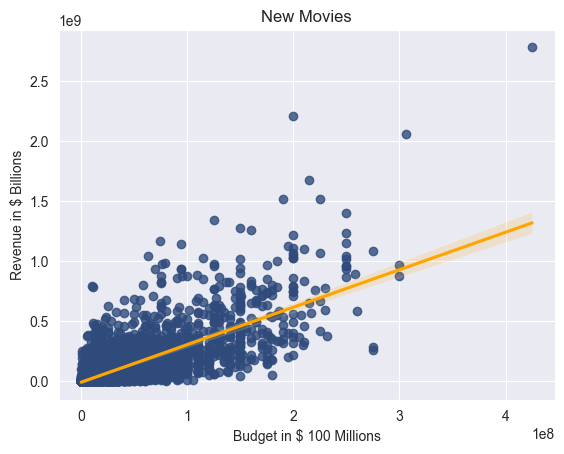

In [174]:
axes = plt.gca()


sns.set_style("darkgrid")
sns.regplot(data=new_films, y='USD_Worldwide_Gross',
                x='USD_Production_Budget',
                scatter_kws= {'color':'#2f4b7c'},
                line_kws= {'color':'orange'},
            ax=axes,
                )

axes.set_ylabel('Revenue in $ Billions')
axes.set_xlabel('Budget in $ 100 Millions')
axes.set_title('New Movies')


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [178]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [216]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
X

,USD_Production_Budget
153,25000000
154,22000000
155,12000000
156,11000000
157,3500000
...,...
5379,40000000
5380,185000000
5381,175000000
5382,42000000


In [217]:
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
y

,USD_Worldwide_Gross
153,0
154,5000000
155,62500000
156,2200000
157,81600000
...,...
5379,166893990
5380,561137727
5381,140012608
5382,57850343


**Challenge**: Run a linear regression for the `new_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [218]:
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_


(array([-8650768.00661042]), array([[3.12259592]]))

In [219]:
reg.score(X,y)

0.5577032617720403

**Challenge**: Run a linear regression for the `new_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [230]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_, reg.score(X, y)


(array([22821538.63508039]), array([[1.64771314]]), 0.02937258620576877)

## Reminder of why R^2 of old_movies is only 2%
- See plot below, a lot of outliers not near line

Text(0.5, 1.0, 'Old Movies')

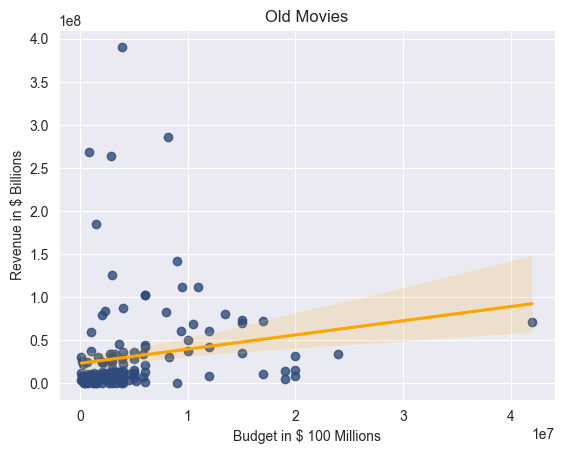

In [199]:
axes = plt.gca()


sns.set_style("darkgrid")
sns.regplot(data=old_films, y='USD_Worldwide_Gross',
            x='USD_Production_Budget',
            scatter_kws={'color': '#2f4b7c'},
            line_kws={'color': 'orange'},
            ax=axes,
            )

axes.set_ylabel('Revenue in $ Billions')
axes.set_xlabel('Budget in $ 100 Millions')
axes.set_title('Old Movies')

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [231]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_, reg.score(X, y)

(array([-8650768.00661042]), array([[3.12259592]]), 0.5577032617720403)

In [232]:
hypothetical_budget = pd.DataFrame(
    [350000000], columns=['USD_Production_Budget'])

In [233]:
reg.predict(hypothetical_budget)

array([[1.0842578e+09]])